In [65]:
import keras
from keras.datasets import mnist
from keras import models, layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [66]:
Nodes = [32, 64, 128, 256, 512, 1024, 2056]
acc = []
for nodes in Nodes:
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    network = models.Sequential()
    network.add(layers.Dense(nodes, activation = 'relu', input_shape = (28*28, )))
    network.add(layers.Dense(10, activation = 'softmax'))
    network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    train_images = train_images.reshape((60000, 28**2))
    train_images = train_images.astype('float32')/255
    test_images = test_images.reshape((10000, 28**2))
    test_images = test_images.astype('float32')/255

    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)
    
    network.fit(train_images, train_labels, epochs = 5, batch_size = 175, verbose = 0)
    test_loss, test_acc = network.evaluate(test_images, test_labels)
    acc.append(test_acc)

10000/10000 [==============================] - 1s 114us/step


In [67]:
acc

[0.9521, 0.9632, 0.9724, 0.9782, 0.982, 0.9798, 0.9814]

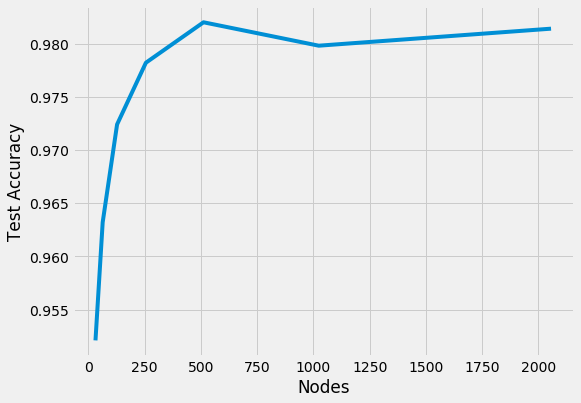

In [68]:
plt.figure(figsize = (8, 6))
plt.style.use('fivethirtyeight')
plt.xlabel('Nodes')
plt.ylabel('Test Accuracy')
plt.plot(Nodes, acc);